In [1]:
import os
import numpy as np
import ising as I
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = I.Ising_lattice(5)
a.random_spins()
a.diagram()


Lattice properties: 5^2 cells, E=10.000000, M=-3, <E>=0.400000, <M>=-0.120000

[['@' ' ' ' ' '@' ' ']
 [' ' '@' ' ' ' ' '@']
 ['@' '@' '@' ' ' ' ']
 [' ' ' ' ' ' ' ' '@']
 [' ' ' ' '@' '@' '@']]


In [3]:
a.spin_flip(0,1); a.diagram()


Lattice properties: 5^2 cells, E=10.000000, M=-1, <E>=0.400000, <M>=-0.040000

[['@' '@' ' ' '@' ' ']
 [' ' '@' ' ' ' ' '@']
 ['@' '@' '@' ' ' ' ']
 [' ' ' ' ' ' ' ' '@']
 [' ' ' ' '@' '@' '@']]


In [11]:
N = 20
a = I.Ising_lattice(N)
nflips = 1000
a.diagram()


Lattice properties: 20^2 cells, E=-12.000000, M=-16, <E>=-0.030000, <M>=-0.040000

[[' ' ' ' '@' ' ' ' ' '@' ' ' '@' ' ' ' ' '@' ' ' '@' '@' ' ' '@' ' ' ' '
  '@' ' ']
 [' ' '@' ' ' '@' '@' '@' '@' ' ' ' ' ' ' ' ' ' ' '@' ' ' '@' '@' '@' ' '
  '@' ' ']
 [' ' ' ' ' ' ' ' '@' '@' ' ' '@' '@' '@' ' ' ' ' ' ' '@' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' '@' '@' '@' '@' ' ' ' ' ' ' '@' '@' ' ' '@' '@' ' ' '@' ' ' ' ' '@'
  ' ' '@']
 ['@' '@' '@' ' ' '@' '@' ' ' '@' ' ' ' ' '@' ' ' '@' ' ' ' ' ' ' '@' '@'
  '@' '@']
 [' ' ' ' ' ' ' ' ' ' '@' ' ' '@' ' ' ' ' ' ' '@' '@' ' ' ' ' ' ' ' ' ' '
  '@' '@']
 ['@' '@' '@' ' ' ' ' ' ' '@' '@' '@' '@' ' ' '@' ' ' ' ' ' ' '@' ' ' ' '
  ' ' '@']
 ['@' ' ' ' ' ' ' '@' '@' ' ' ' ' '@' ' ' '@' '@' '@' '@' ' ' ' ' ' ' '@'
  ' ' '@']
 ['@' ' ' '@' '@' ' ' ' ' '@' '@' '@' ' ' '@' '@' '@' ' ' '@' '@' ' ' '@'
  ' ' ' ']
 [' ' ' ' ' ' '@' '@' '@' '@' '@' '@' '@' '@' ' ' '@' '@' '@' ' ' '@' '@'
  ' ' ' ']
 ['@' '@' ' ' ' ' ' ' '@' ' ' '@' '@' '@' '@' '@' '@' '@' ' ' '@' 

In [12]:
n = 0
energy = []
magnet = []
temp = 0
print a.diagram()
while n < nflips:
    i = int(np.random.random()*N)
    j = int(np.random.random()*N)
    a.cond_spin_flip(i,j,temp); 
    energy.append(a._E)
    magnet.append(a._M)
    n +=1
a.diagram()


Lattice properties: 20^2 cells, E=-12.000000, M=-16, <E>=-0.030000, <M>=-0.040000

[[' ' ' ' '@' ' ' ' ' '@' ' ' '@' ' ' ' ' '@' ' ' '@' '@' ' ' '@' ' ' ' '
  '@' ' ']
 [' ' '@' ' ' '@' '@' '@' '@' ' ' ' ' ' ' ' ' ' ' '@' ' ' '@' '@' '@' ' '
  '@' ' ']
 [' ' ' ' ' ' ' ' '@' '@' ' ' '@' '@' '@' ' ' ' ' ' ' '@' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' '@' '@' '@' '@' ' ' ' ' ' ' '@' '@' ' ' '@' '@' ' ' '@' ' ' ' ' '@'
  ' ' '@']
 ['@' '@' '@' ' ' '@' '@' ' ' '@' ' ' ' ' '@' ' ' '@' ' ' ' ' ' ' '@' '@'
  '@' '@']
 [' ' ' ' ' ' ' ' ' ' '@' ' ' '@' ' ' ' ' ' ' '@' '@' ' ' ' ' ' ' ' ' ' '
  '@' '@']
 ['@' '@' '@' ' ' ' ' ' ' '@' '@' '@' '@' ' ' '@' ' ' ' ' ' ' '@' ' ' ' '
  ' ' '@']
 ['@' ' ' ' ' ' ' '@' '@' ' ' ' ' '@' ' ' '@' '@' '@' '@' ' ' ' ' ' ' '@'
  ' ' '@']
 ['@' ' ' '@' '@' ' ' ' ' '@' '@' '@' ' ' '@' '@' '@' ' ' '@' '@' ' ' '@'
  ' ' ' ']
 [' ' ' ' ' ' '@' '@' '@' '@' '@' '@' '@' '@' ' ' '@' '@' '@' ' ' '@' '@'
  ' ' ' ']
 ['@' '@' ' ' ' ' ' ' '@' ' ' '@' '@' '@' '@' '@' '@' '@' ' ' '@' 

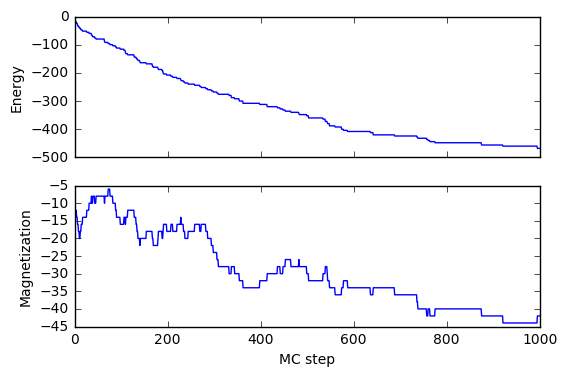

In [13]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(energy)
ax[1].plot(magnet)
ax[1].set_xlabel('MC step')
ax[0].set_ylabel('Energy')
ax[1].set_ylabel('Magnetization')

In [16]:
command = "convert -delay 1 -size 100x100"
temp = 1
H = 0
fout = open("output_T%g_H%g.dat"%(temp,H),"w")
n = 0
k = 0
nflips = 10000
while n < nflips:
    i = np.random.random()*N
    j = np.random.random()*N
    a.cond_spin_flip(i,j,temp)

    if n % 1000 == 0:
        fout.write ("%8i %8i %8i %8i\n"%(n,a._E,a._M,abs(a._M)))
    if n % 1000 == 0:
        k +=1
        try: 
            a.plot(k)
        except IOError:
            os.mkdir("pngs")
        command += " pngs/ising%g.png"%k
    n+=1
    

command +=" animation_T%g_H%g.gif"%(temp,H)
os.system(command)
fout.close()

In [8]:
a.diagram()


Lattice properties: 8^2 cells, E=-128.000000, M=-64, <E>=-2.000000, <M>=-1.000000

[[' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']]
